In [1]:
#Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
#import imblearn
import pickle
#import lime
#import lime.lime_tabular

In [2]:
#Load the dataset
file_name = '2021_PUDB_EXPORT_123121.csv'
df = pd.read_csv(file_name,  header=0) 
df.shape


(63890, 56)

In [3]:
df.info()
#56 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63890 entries, 0 to 63889
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             63890 non-null  int64  
 1   LoanCharacteristicsID            63890 non-null  int64  
 2   Bank                             63890 non-null  object 
 3   FIPSStateNumericCode             63890 non-null  int64  
 4   FIPSCountyCode                   63890 non-null  int64  
 5   CoreBasedStatisticalAreaCode     63890 non-null  int64  
 6   CensusTractIdentifier            63890 non-null  float64
 7   CensusTractMinorityRatioPercent  63890 non-null  float64
 8   CensusTractMedFamIncomeAmount    63890 non-null  int64  
 9   LocalAreaMedianIncomeAmount      63890 non-null  int64  
 10  TotalMonthlyIncomeAmount         63890 non-null  int64  
 11  HUDMedianIncomeAmount            63890 non-null  int64  
 12  LoanAcquisitionAct

In [4]:
df.describe()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
count,63890.0,6.389000e+04,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,...,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.000000,63890.0
mean,2021.0,2.626657e+06,30.169432,92.398842,44383.391767,3519.306456,13.702152,84251.561606,75034.526389,9770.325826,...,6.886680,6.887009,6.887025,3.253248,7.340679,7.345484,7.345704,7.345751,2.006496,1.0
std,0.0,2.864535e+04,14.163276,78.299504,31114.230250,4065.009753,15.551072,28090.094325,11642.076385,8978.051305,...,0.317775,0.316733,0.316615,1.472440,0.605515,0.592665,0.592061,0.591915,0.080528,0.0
min,2021.0,2.585135e+06,1.000000,1.000000,10100.000000,1.000000,0.000000,0.000000,0.000000,794.000000,...,3.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,5.000000,1.000000,1.0
25%,2021.0,2.605211e+06,18.000000,37.000000,19820.000000,106.000000,4.000000,65672.000000,67277.000000,5405.250000,...,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,7.000000,7.000000,2.000000,1.0
50%,2021.0,2.622994e+06,27.000000,81.000000,33340.000000,803.000000,7.998500,78430.500000,73857.000000,8042.000000,...,7.000000,7.000000,7.000000,2.000000,7.000000,7.000000,7.000000,7.000000,2.000000,1.0
75%,2021.0,2.639190e+06,41.000000,131.000000,48580.000000,9002.000000,16.998000,97012.000000,80703.000000,11666.000000,...,7.000000,7.000000,7.000000,5.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.0
max,2021.0,2.690373e+06,66.000000,840.000000,99999.000000,9902.000000,99.866000,250001.000000,150332.000000,817114.000000,...,7.000000,7.000000,7.000000,5.000000,8.000000,8.000000,8.000000,8.000000,3.000000,1.0


In [5]:
#remove discriminatory attributes
df.drop(df.columns[44:54], axis=1, inplace=True)
df.drop(df.columns[24:28], axis=1, inplace=True)

#remove dates
df.drop(df.columns[14:16], axis=1, inplace=True)
df.drop(df.columns[37:38], axis=1, inplace=True)

In [6]:
#Change PropertyType to numeric 
df['NumericPropertyType'] = df['PropertyType'].str[2:].astype('int64')

# Drop the original "PropertyType" column
df.drop(columns=['PropertyType'], inplace=True)

#Drop Bank
df.drop(columns=['Bank'], inplace=True)

In [7]:
# update credit score missing value to 0
df['Borrower1CreditScoreValue'].replace(9, 0, inplace=True) 
df['Borrower2CreditScoreValue'].replace(9, 0, inplace=True) 
print(df['Borrower1CreditScoreValue'].value_counts())
print(df['Borrower1CreditScoreValue'].value_counts())

5    35769
4    18943
3     6892
2     2111
0      100
1       75
Name: Borrower1CreditScoreValue, dtype: int64
5    35769
4    18943
3     6892
2     2111
0      100
1       75
Name: Borrower1CreditScoreValue, dtype: int64


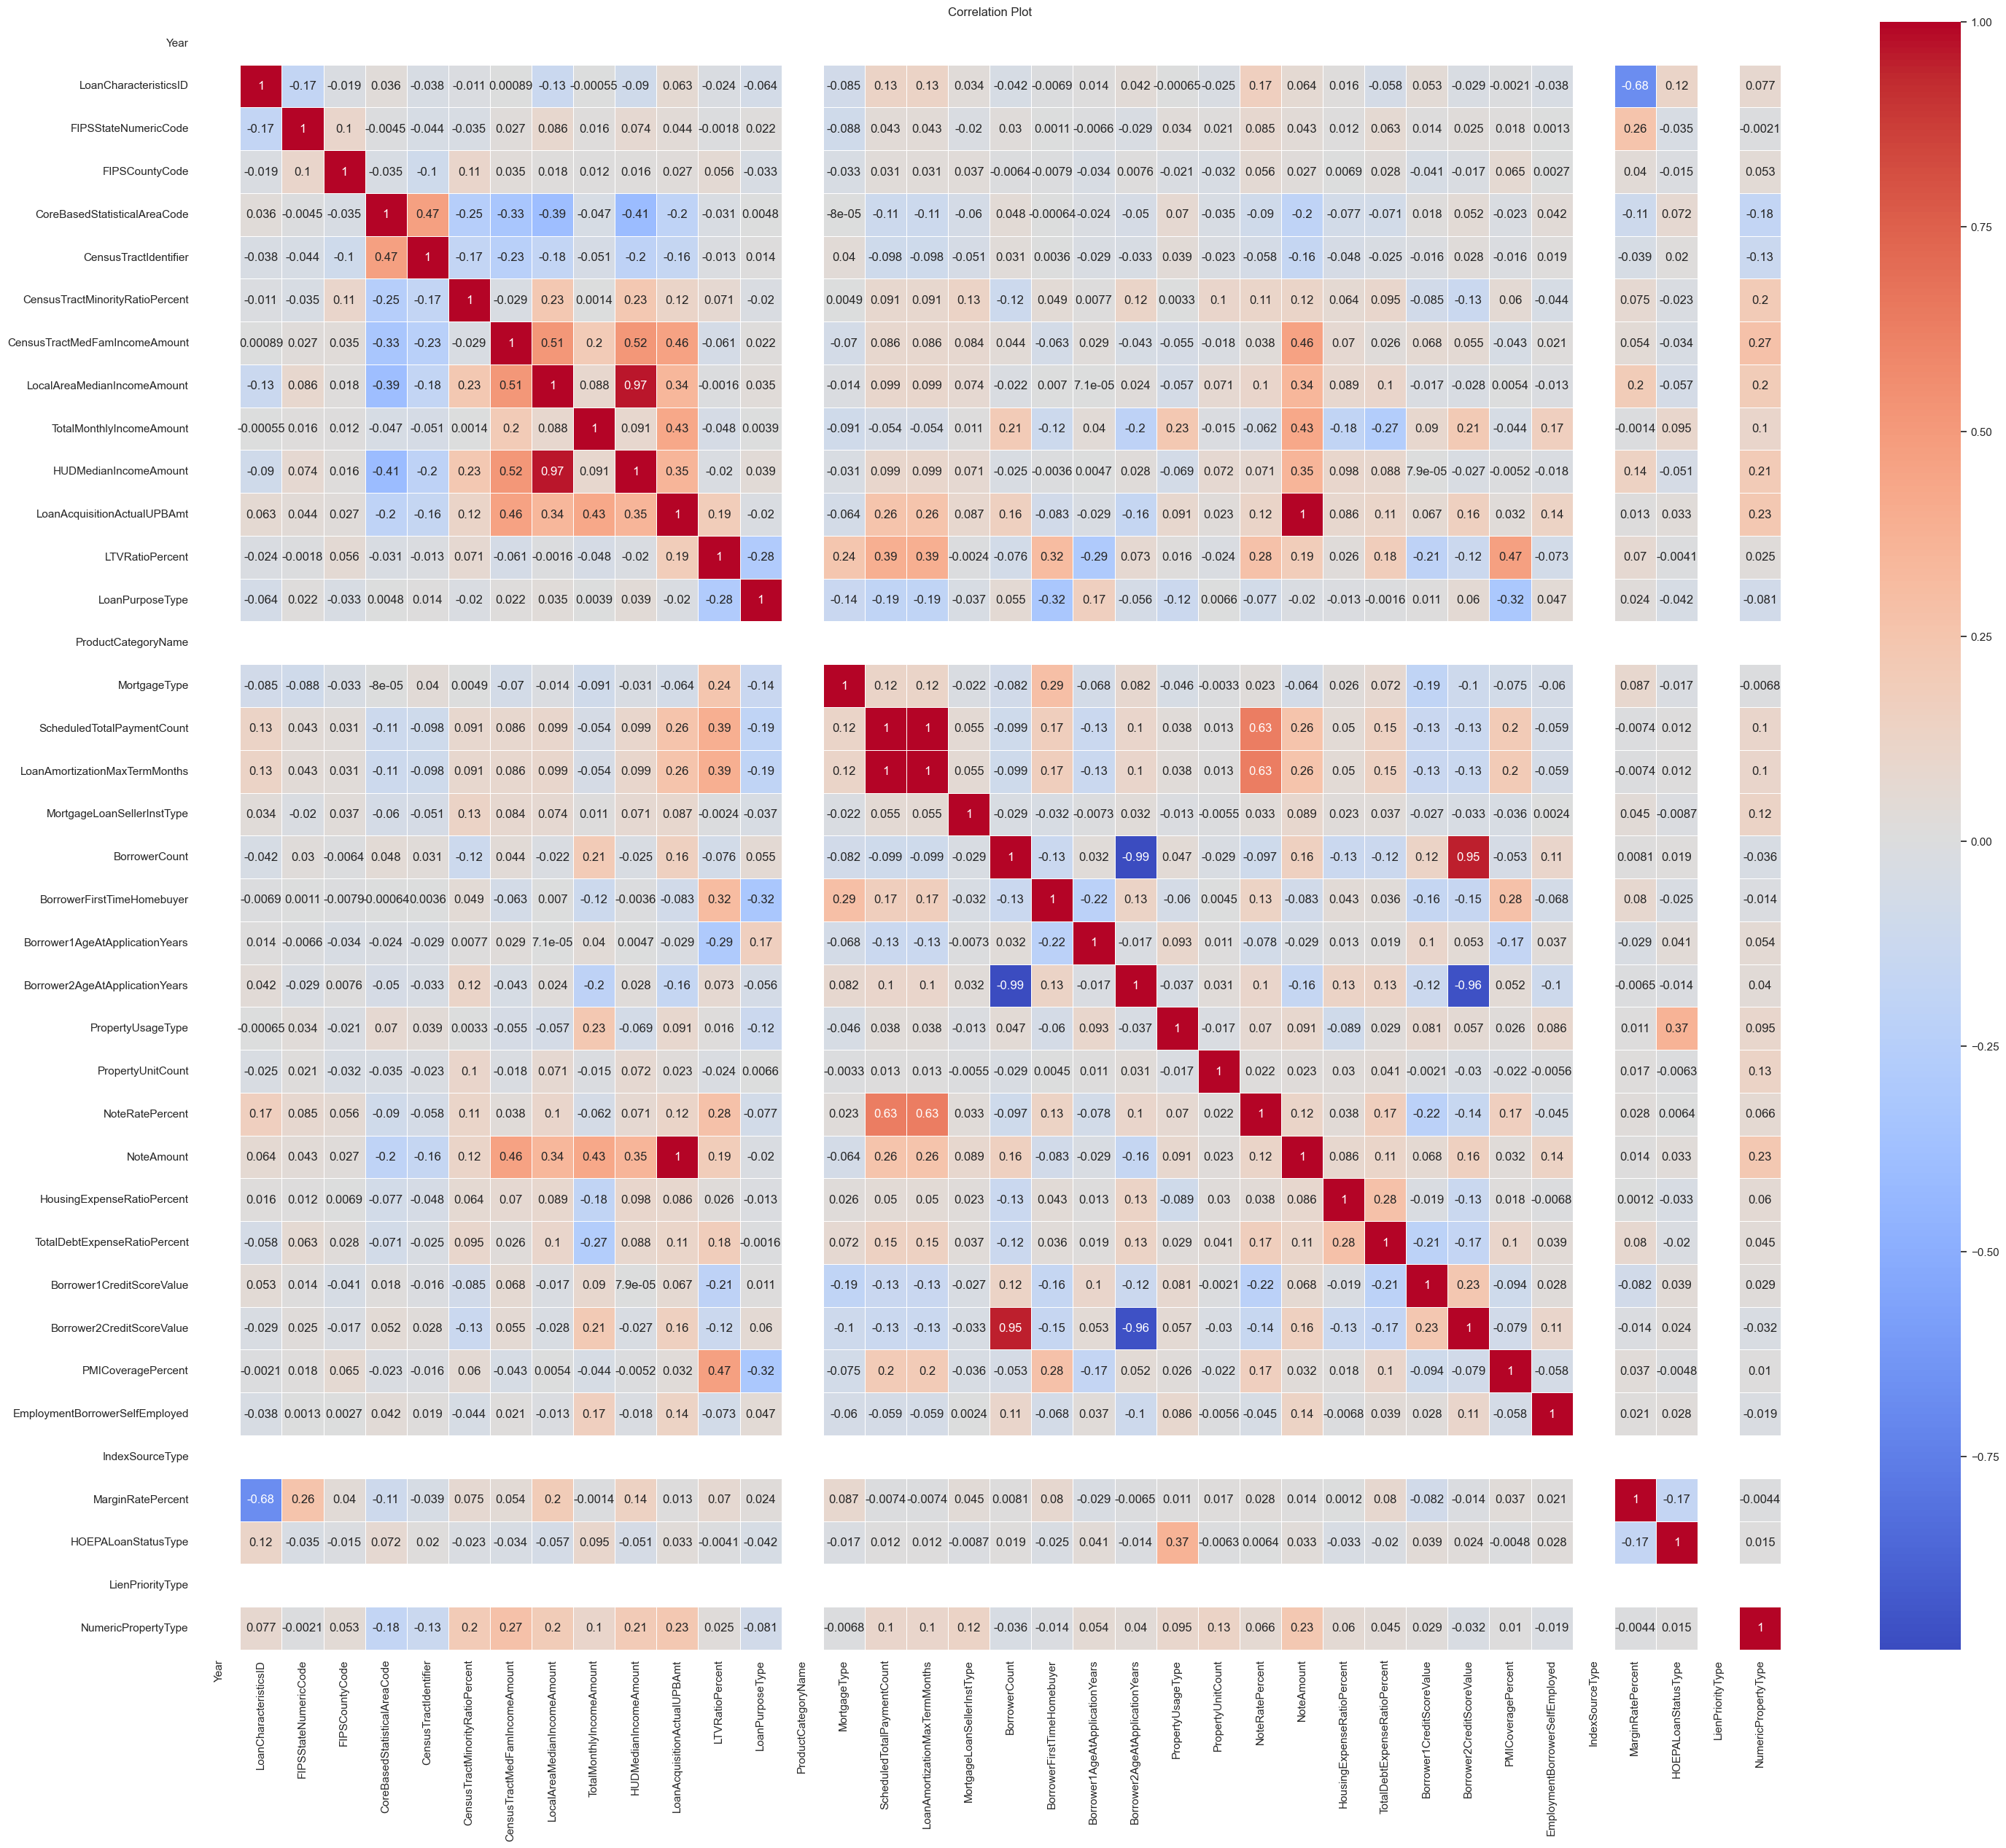

In [8]:
#checking the correlation plot
correlation_matrix = df.corr()

# Set the style of the plot (optional)
sns.set(style='white')

# Create a heatmap of the correlation matrix with a larger figure size
plt.figure(figsize=(35, 29))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Plot")
plt.show()

In [9]:
#Using Kit's Features
selected_features = [
    "TotalMonthlyIncomeAmount",
    "LoanAcquisitionActualUPBAmt",
    "NumericPropertyType",
    "PropertyUnitCount",
    "FIPSStateNumericCode",
    "CensusTractMedFamIncomeAmount",
    "LTVRatioPercent",
    "ScheduledTotalPaymentCount",
    "NoteRatePercent",
    "TotalDebtExpenseRatioPercent",
    "HousingExpenseRatioPercent",
    "Borrower1AgeAtApplicationYears"
]

X = df[selected_features] 
y = df['Borrower1CreditScoreValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.5875723900453905
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        16
           2       0.32      0.03      0.06       430
           3       0.34      0.08      0.12      1390
           4       0.42      0.30      0.35      3708
           5       0.64      0.87      0.74      7210

    accuracy                           0.59     12778
   macro avg       0.29      0.21      0.21     12778
weighted avg       0.53      0.59      0.53     12778



/Users/nigel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nigel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nigel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_features = [
    "TotalMonthlyIncomeAmount",
    "LoanAcquisitionActualUPBAmt",
    "NumericPropertyType",
    "PropertyUnitCount",
    "FIPSStateNumericCode",
    "CensusTractMedFamIncomeAmount",
    "LTVRatioPercent",
    "ScheduledTotalPaymentCount",
    "NoteRatePercent",
    "TotalDebtExpenseRatioPercent",
    "HousingExpenseRatioPercent",
    "Borrower1AgeAtApplicationYears"
]

X = df[selected_features] 
y = df['Borrower1CreditScoreValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace RandomForestClassifier with DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.4658788542807951
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        16
           2       0.09      0.10      0.09       430
           3       0.15      0.17      0.16      1390
           4       0.34      0.36      0.35      3708
           5       0.64      0.60      0.62      7210

    accuracy                           0.47     12778
   macro avg       0.20      0.20      0.20     12778
weighted avg       0.48      0.47      0.47     12778



In [11]:
#install imblearn
#!pip install imblearn

In [12]:
#synthetic minority oversampling technique
#SMOTE works by selecting examples that are close in the feature space,
#drawing a line between the examples in the feature space 
#and drawing a new sample at a point along that line.
from imblearn.over_sampling import SMOTE
X = df[selected_features] 
y = df['Borrower1CreditScoreValue']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

Accuracy: 0.8331896652144538
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7103
           1       0.99      1.00      1.00      7183
           2       0.87      0.93      0.90      7142
           3       0.78      0.78      0.78      7295
           4       0.65      0.53      0.59      7059
           5       0.69      0.75      0.72      7141

    accuracy                           0.83     42923
   macro avg       0.83      0.83      0.83     42923
weighted avg       0.83      0.83      0.83     42923



In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

# Define the random forest classifier
model = RandomForestClassifier(random_state=42)

# Define the number of folds for cross-validation
num_folds = 5  # You can change this to the desired number of folds

# Perform k-fold cross-validation and store the scores for each fold
scores = cross_val_score(model, X, y, cv=num_folds, scoring=make_scorer(accuracy_score))

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold} - Accuracy: {score:.4f}")


Fold 1 - Accuracy: 0.5873
Fold 2 - Accuracy: 0.5907
Fold 3 - Accuracy: 0.5714
Fold 4 - Accuracy: 0.5769
Fold 5 - Accuracy: 0.5795


In [ ]:
# Trying other features here ...
# Only take columns that have atleast 0.05 absolute correlation.
# Compute the correlation matrix
# correlation_matrix = df.corr()

# # Set the threshold values for correlation
# min_correlation = 0.06
# max_correlation = 0.99

# # Get the columns with correlations with 'borrower1' within the specified range
# correlated_columns = []

# # Iterate through the correlation matrix for 'borrower1'
# for col in correlation_matrix.columns:
#     if col != 'Borrower1CreditScoreValue':  # Exclude correlations with 'borrower1' itself
#         correlation = abs(correlation_matrix['Borrower1CreditScoreValue'][col])
#         if min_correlation < correlation < max_correlation:
#             correlated_columns.append(col)

# # Print or return the list of columns
# correlated_columns.remove("Borrower2AgeAtApplicationYears")
# correlated_columns.remove("Borrower2CreditScoreValue")
# print(str(len(correlated_columns)) + ' columns')
# print(correlated_columns)

In [ ]:
#subsetting the dataset and getting the correlation values
# features = list(correlated_columns) #separate copy of the list
# correlated_columns.append('Borrower1CreditScoreValue')
# df = df[correlated_columns]
# df.corr()

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import StratifiedKFold
# # Using the 17 features.
# X = df[features]
# y = df['Borrower1CreditScoreValue']
# kf = StratifiedKFold(n_splits=5)
# # score = []
# # for train_index, test_index in kf.split(X, y):
# #     X_train, X_test = X[train_index], X[test_index]
# #     y_train, y_test = y[train_index], y[test_index]
# #     model = DecisionTreeClassifier(random_state=42, min_samples_leaf = 500)
# #     model.fit(X_train, y_train)
# #     score.append(model.score(X_test, y_test))
# #     print(model.score(X_test, y_test))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# model = RandomForestClassifier(random_state=42, n_estimators = 400, min_samples_leaf = 300)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# classification_report_result = classification_report(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report_result)
